In [2]:
import pandas as pd
import numpy as np
import threading
import pandas as pd, numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm

In [2]:


column = "word_seg"
train = pd.read_csv('D://datas/text/train_set.csv')[column]
test = pd.read_csv('D://datas/text/test_set.csv')[column]

### gensim

In [3]:
import jieba, os
import codecs
from gensim import corpora, models, similarities
from pprint import pprint
from collections import defaultdict

D:\SOFTWARES\ANACONDA3\lib\site-packages\gensim\utils.py:863: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
a = [['一','三','二','三','三'],['二','三','三']]
b = ['一','一','三','四','四']
dictionary = corpora.Dictionary(a)
print('id在多少文档出现:{}'.format(dictionary.dfs))
print('文档数：{}'.format(dictionary.num_docs))
print('字典列表：{}'.format(list(dictionary.items())))
print('id2token:{}'.format(dictionary.id2token))
print('所有词个数：{}'.format(dictionary.num_pos))
print('每个文件非重复词数量:{}'.format(dictionary.num_nnz))
print('更新字典......')
dictionary.add_documents([b])
print('id在多少文档出现:{}'.format(dictionary.dfs))
print('文档数：{}'.format(dictionary.num_docs))
print('字典列表：{}'.format(list(dictionary.items())))
print('id2token:{}'.format(dictionary.id2token))
print('所有词个数：{}'.format(dictionary.num_pos))
print('每个文件非重复词数量:{}'.format(dictionary.num_nnz))
print('--------'*5)
result, missing = dictionary.doc2bow(b, allow_update=False, return_missing=True)
print ("词袋b，列表[(单词id，词频)]")
print (result)
print ("不在字典中的词及其词频，字典[(单词，词频)]")
print(missing)
for ids, freq in result:
    print(ids, dictionary.id2token[ids], freq)
print("########dictionary信息##########")
#过滤文档频率大于no_below，小于no_above*num_docs的词
dictionary.filter_extremes(no_below=1, no_above=0.5, keep_n=10)

id在多少文档出现:{0: 1, 1: 2, 2: 2}
文档数：2
字典列表：[(0, '一'), (1, '三'), (2, '二')]
id2token:{0: '一', 1: '三', 2: '二'}
所有词个数：8
每个文件非重复词数量:5
更新字典......
id在多少文档出现:{0: 2, 1: 3, 2: 2, 3: 1}
文档数：3
字典列表：[(0, '一'), (1, '三'), (2, '二'), (3, '四')]
id2token:{0: '一', 1: '三', 2: '二', 3: '四'}
所有词个数：13
每个文件非重复词数量:8
----------------------------------------
词袋b，列表[(单词id，词频)]
[(0, 2), (1, 1), (3, 2)]
不在字典中的词及其词频，字典[(单词，词频)]
{}
0 一 2
1 三 1
3 四 2
########dictionary信息##########


In [5]:
a = dir(dictionary)
for i in  a:
    if not i.startswith('_'):
        print(i)

add_documents
compactify
dfs
doc2bow
filter_extremes
filter_n_most_frequent
filter_tokens
from_corpus
from_documents
get
id2token
items
iteritems
iterkeys
itervalues
keys
load
load_from_text
merge_with
num_docs
num_nnz
num_pos
save
save_as_text
token2id
values


### 使用gensim制作词典

In [6]:
train_word = [[j for j in i.split(' ') if j] for i in train.values if i ]
dictionary = corpora.Dictionary(train_word)

In [7]:
train_word.clear()
train = None

In [8]:
dictionary.num_docs

102277

In [9]:
dictionary.num_pos

73327966

In [10]:
dictionary.num_nnz

31307531

In [11]:
test_word = [[j for j in i.split(' ') if j] for i in test.values if i]
dictionary.add_documents(test_word)

In [12]:
test_word.clear()
test  = None

In [13]:
dictionary.num_docs / 2

102277.0

In [14]:
dictionary.num_pos

146768186

In [15]:
#dictionary.filter_n_most_frequent(5)

In [16]:
dictionary.compactify()

In [17]:
#dictionary.token2id

In [18]:
print('字典长度：{}'.format(len(dictionary.token2id.keys())))

字典长度：1271460


In [19]:
np.save('dict',dictionary.token2id)

In [20]:
dictionary = None

### 保存训练集标签

In [21]:
labels = pd.read_csv('D://datas/text/train_set.csv')['class']

In [22]:
len(labels.values)

102277

In [23]:
np.save('labels',labels.values)
labels = None

### 用词典id表示词

In [3]:
dic = np.load('dict.npy').tolist()

In [4]:
train = pd.read_csv('D://datas/text/train_set.csv')['word_seg']

In [5]:
token_to_id = [[dic.get(word) for word in doc.split(' ') if dic.get(word)] for doc in train]
train = None

In [7]:
np.save('trian_docs',token_to_idn_to_id)
token_to_id = None

In [6]:
a = len(token_to_id)
ls = [len(token_to_id[i]) for i in range(a)]
n = np.sum(ls)
n / a

677.22880021901312

In [28]:
import matplotlib.pyplot as plt

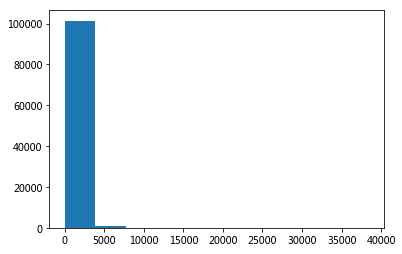

In [29]:
plt.hist(ls)
plt.show()

In [30]:
b = sorted(ls,reverse=True)

In [31]:
with open('b','w') as f:
    for i in b:
        f.write(str(i)+"\n")

In [32]:
### 长度1000以上的单独训练分类器，长度1000以下的训练一个分类器
train_0_1000_docs = [(i,token_to_id[i]) for i in range(len(token_to_id)) if len(token_to_id[i]) <=1000 ]
train_1000_5000_docs = [(i,token_to_id[i]) for i in range(len(token_to_id))  if len(token_to_id[i]) > 1000  and len(token_to_id[i]) < 5000]
train_g_5000_docs = [(i,token_to_id[i]) for i in range(len(token_to_id)) if len(token_to_id[i]) >=5000 ]

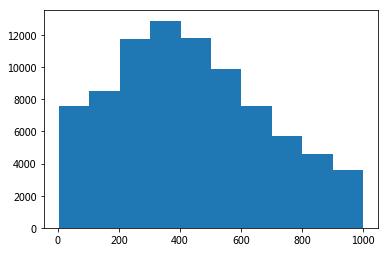

84096

In [33]:
plt.hist([len(i[1]) for i in train_0_1000_docs])
plt.show()
len(train_0_1000_docs)

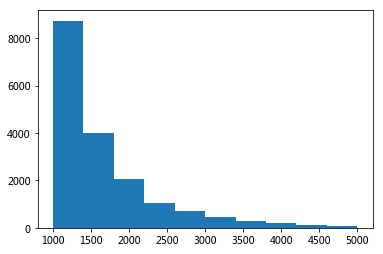

17749

In [34]:
plt.hist([len(i[1]) for i in train_1000_5000_docs])
plt.show()
len(train_1000_5000_docs)

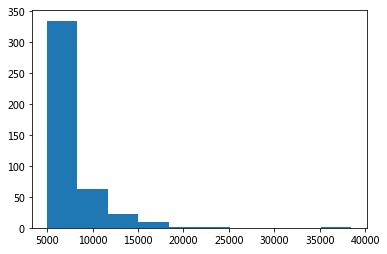

432

In [35]:
plt.hist([len(i[1]) for i in train_g_5000_docs])
plt.show()
len(train_g_5000_docs)

In [36]:
labels = np.load('labels.npy')
index_to_label = dict(zip(list(range(len(labels))),labels))

In [37]:
#保存不同文本长度对应的label
np.save('train_0_1000_docs',[tupe[1] for tupe in train_0_1000_docs])
np.save('train_0_1000_labels',[index_to_label.get(tupe[0]) for tupe in train_0_1000_docs])

np.save('train_1000_5000_docs',[tupe[1] for tupe in train_1000_5000_docs])
np.save('train_1000_5000_labels',[index_to_label.get(tupe[0]) for tupe in train_1000_5000_docs])

np.save('train_g_5000_docs',[tupe[1] for tupe in train_g_5000_docs])
np.save('train_g_5000_labels',[index_to_label.get(tupe[0]) for tupe in train_g_5000_docs])

In [38]:
train = None
token_to_id.clear()
train_0_1000_docs.clear()
train_1000_5000_docs.clear()
train_g_5000_docs.clear()

In [8]:
test = pd.read_csv('D://datas/text/test_set.csv')['word_seg']

In [9]:
test_to_id = [[dic.get(word) for word in doc.split(' ') if dic.get(word)] for doc in test]
test = None

In [10]:
np.save('test_docs',test_to_id)

In [41]:
test_0_1000_docs = [(i,test_to_id[i]) for i in range(len(test_to_id))  if len(test_to_id[i]) <=1000 ]
test_1000_5000_docs = [(i,test_to_id[i]) for i in range(len(test_to_id)) if len(test_to_id[i]) > 1000  and len(test_to_id[i])<5000]
test_g_5000_docs = [(i,test_to_id[i]) for i in range(len(test_to_id)) if len(test_to_id[i]) >=5000 ]

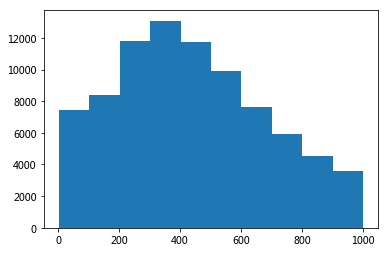

84010

In [42]:
plt.hist([len(i[1]) for i in test_0_1000_docs])
plt.show()
len(test_0_1000_docs)

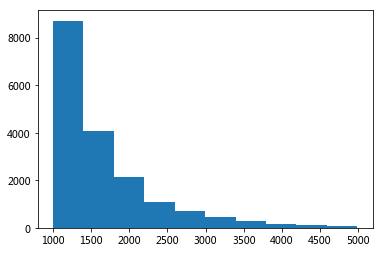

17831

In [43]:
plt.hist([len(i[1]) for i in test_1000_5000_docs])
plt.show()
len(test_1000_5000_docs)

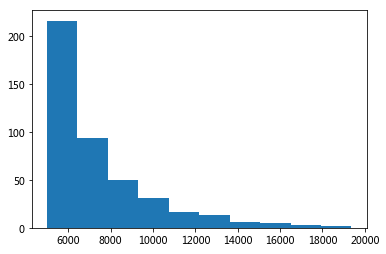

436

In [44]:
plt.hist([len(i[1]) for i in test_g_5000_docs])
plt.show()
len(test_g_5000_docs)

In [45]:
### 根据文档的长度
np.save('test_0_1000_docs',[tupe[1] for tupe in test_0_1000_docs])

np.save('test_1000_5000_docs',[tupe[1] for tupe in test_1000_5000_docs])

np.save('test_g_5000_docs',[tupe[1] for tupe in test_g_5000_docs])


In [2]:
### 做词嵌入操作
dic = np.load('dict.npy').tolist()
train = pd.read_csv('D://datas/text/train_set.csv')['word_seg']
test = pd.read_csv('D://datas/text/test_set.csv')['word_seg']
train_docs = [[word for word in doc.split(' ') if dic.get(word)] for doc in train]
test_docs = [[word for word in doc.split(' ') if dic.get(word)] for doc in test]
all_docs = train_docs + test_docs

In [3]:
train = None
test = None
train_docs.clear()
test_docs.clear()

D:\SOFTWARES\ANACONDA3\lib\site-packages\gensim\utils.py:863: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [6]:
with open('all_token','wt',encoding='utf8') as f:
    for doc in all_docs:
        content = ' '.join(doc)
        f.write(content+"\n")
    f.flush()

In [1]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
#sentences = LineSentence('./all_token')
# size：词向量的维度
# window：上下文环境的窗口大小
# min_count：忽略出现次数低于min_count的词
#model = Word2Vec(sentences, size=128, window=5, min_count=1, workers=10,compute_loss=True,iter=200,sg=0)

# 保存模型
#model.save('./word_embedding_128')

D:\SOFTWARES\ANACONDA3\lib\site-packages\gensim\utils.py:863: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
